---
## Model Formulation

### Sets and Indices

$q \in \text{Q}$: Set of O-D Pair.

$k \in \text{K}$: Set of Potential facility location.

$\text{Q} \in \text{N}_{q}$: Set of nodes capable of capturing the flow $\text{$f$}_{q}$.

$\text{F}_{k}$: Set of flow through node $k$.

-
### Parameters

$\text{$f$}_{q}$: Flow volume between O-D pair.

$\text{d}_k $: Statistical, theoretical demand at node $k$.

$\text{FC} $: Fixed station opening cost.

$\text{VC}$: Variable station opening cost.

$\text{B}$: Budget.

$\text{P}$: The number of opening stations.

$\text{M}$: Large number BIG M.


-
### Decision Variables


$\text{x}_{k} $: The number of modules at facility $k$.

$\text{y}_{q} $: Proportion of $\text{$f$}_{q}$ being refueled by station $\text k \in \text{N}_{q}$, considering shared demand at nodes.

$\text{z}_{k} \in \mathbb\{0,1\}$: = 1, if the station is opened at $k$ (0, otherwise).




-
### Objective Function

- **Maximize** the total captured flow volume.

\begin{equation}
\text{Max} \quad Z = \sum_{q \in \text{Q}}
\text{$f$}_q*\text{y}_{q}
\tag{0}
\end{equation}

### Constraints

- **Module Constraint:** 
\begin{equation}
\sum_{k \in \text{N}_{q}}\text{x}_{k}/\text{d}_{k} = \text{y}_q \quad \forall (q) \in \text{Q}
\tag{1}
\end{equation}

- **Capacity Constraint:**

\begin{equation}
\sum_{k \in \text{K}}\text{x}_{k}= \text{P} 
\tag{2}
\end{equation}

- **? Constraint:** 

\begin{equation}
\text{k}_{k} \leq \text{z}_{k} * \text{M}  \quad \forall k \in \text{K} 
\tag{3}
\end{equation}

- **Budget Constraint:** 

\begin{equation}
\text{z}_{k} * FC + \text{x}_{k} * VC \leq B  \quad \forall k \in \text{K} 
\tag{4}
\end{equation}

- **Non-negativity Constraint:** 

\begin{equation}
\text{x}_{k} \geq 0  \quad \forall k \in \text{K} 
\tag{5}
\end{equation}

- **Proportionality Constraint:** 

\begin{equation}
0 \leq \text{y}_{q} \leq 1    \quad \forall q \in \text{Q} 
\tag{6}
\end{equation}

- **Binary Constraint:** 

\begin{equation}
\text{z}_{k} \in \mathbb\{0,1\}    \quad \forall k \in \text{K} 
\tag{7}
\end{equation}

In [1]:
pip install geopandas osmnx pandas networkx matplotlib

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for osmnx from https://files.pythonhosted.org/packages/8e/11/3dbecaea995f5271623820bb8110b7412af8896a440384d213983df40b18/osmnx-1.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/62/50/cc0cbc48d4f11899611edfb23a99d9d43101d3d28f2ef90a5506782cae84/fiona-1.9.5-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/30/bd/b9bd3761f08754e8dbb34c5a647db2099b348ab5da338e90980caf280e37/pyproj-3.6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonh

In [2]:
import warnings
import geopandas as gpd
import osmnx as osm
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore", category=DeprecationWarning)

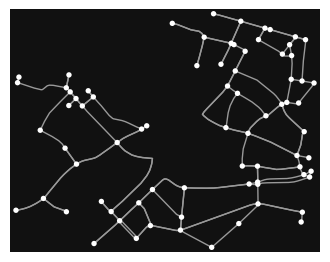

In [4]:
city = "Munich, Germany"

# Geocode the city center
city_center = osm.geocoder.geocode(city)

# Create a network graph within 5 km of the city center
G = osm.graph_from_point(city_center, dist=500, dist_type='bbox', network_type='drive')

# Plot the graph
fig, ax = osm.plot_graph(G, figsize=(4, 4))



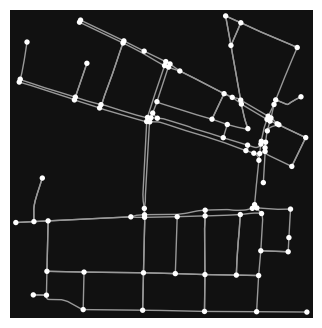

In [5]:
import osmnx as ox

# Specify the location (Marienplatz in Munich)
location = "hbf, Munich, Germany"

# Geocode the city center (Marienplatz)
city_center = ox.geocode(location)

# Create a network graph within 1 km of the city center
# Note: The distance is in meters, so 1000 meters is 1 km
G = ox.graph_from_point(city_center, dist=500, dist_type='bbox', network_type='drive')

# Plot the graph
fig, ax = ox.plot_graph(G, figsize=(4, 4))


# Set of O-D Pair (Q) Generation 

The Origin - Destination set has been defined by popular areas in Munich. For the beginning of implementation, only 5 pairs are selected and the shortest paths between each origin and destination nodes are chosen. 

O-D Pair: [(Marienplatz - Olympiapark), (HBF - BMW), (Münchener Freiheit - TUM), (Olympia park - Münchner Freiheit), (TUM - Marienplatz)]

### If we convert this pairs to coordinates, 

Q = [((48.1362556, 11.5747444), (48.1633172, 11.5468448)),
 ((48.1419777, 11.5561824), (48.1636602, 11.5627361)),
 ((48.1640601, 11.5900955), (48.1492624, 11.5660509)),
 ((48.1640601, 11.5900955), (48.1633172, 11.5468448)),
 ((48.1492624, 11.5660509), (48.1362556, 11.5747444))]
 
 ## Visualization of Q

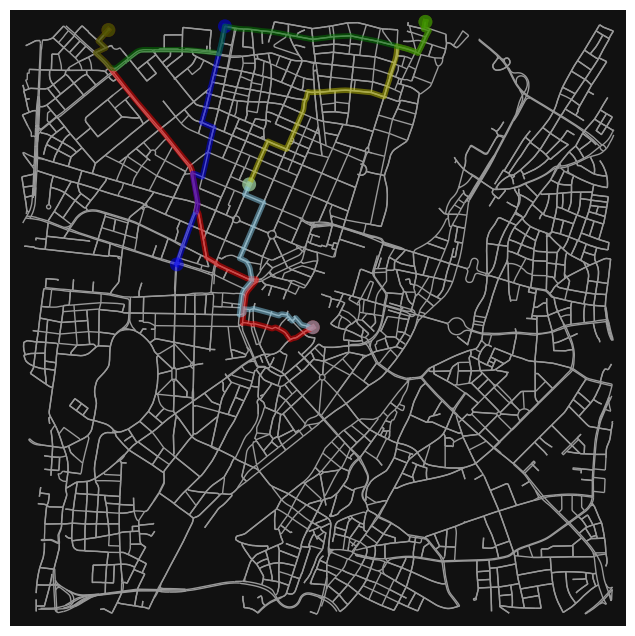

In [59]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define locations
locations = {
    "Marienplatz": "Marienplatz, Munich, Germany",
    "Olympiapark": "Olympiapark, Munich, Germany",
    "HBF": "Hauptbahnhof, Munich, Germany",
    "BMW": "BMW Welt, Munich, Germany",
    "TUM City Center": "Arcisstraße 21, 80333 Munich, Germany",
    "Münchener Freiheit": "Münchener Freiheit, Munich, Germany"
}

# Geocode locations
coords = {name: ox.geocode(loc) for name, loc in locations.items()}

# Create a network graph for Munich
G = ox.graph_from_address("Munich, Germany", network_type='drive', dist=3000)

# Find the nearest nodes to the locations
nearest_nodes = {name: ox.distance.nearest_nodes(G, point[1], point[0]) for name, point in coords.items()}

# Calculate the shortest paths
route1 = nx.shortest_path(G, nearest_nodes["Marienplatz"], nearest_nodes["Olympiapark"], weight='length')
route2 = nx.shortest_path(G, nearest_nodes["HBF"], nearest_nodes["BMW"], weight='length')
route3 = nx.shortest_path(G, nearest_nodes["Münchener Freiheit"], nearest_nodes["TUM City Center"], weight='length')
route4 = nx.shortest_path(G, nearest_nodes["Münchener Freiheit"], nearest_nodes["Olympiapark"], weight='length')
route5 = nx.shortest_path(G, nearest_nodes["TUM City Center"], nearest_nodes["Marienplatz"], weight='length')

# Initialize an empty list to store O-D pairs
od_pairs = []

# Define a function to get the coordinates of a node
def get_coords_from_node(graph, node_id):
    node = graph.nodes[node_id]
    return node['y'], node['x']

# Iterate over each route and extract the O-D pairs
for route in [route1, route2, route3, route4, route5]:
    origin_coords = get_coords_from_node(G, route[0])
    destination_coords = get_coords_from_node(G, route[-1])
    od_pairs.append((origin_coords, destination_coords))

# Display the O-D pairs
Q = od_pairs
Q

# Plot the graph and both routes

routes = [route1, route2, route3, route4, route5]
rc = ['r', 'b','y','green', 'skyblue']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0)
plt.show()


# Set of capable nodes within the path (Nq)

Route 1 Coordinates: [(48.1362556, 11.5747444), (48.1361601, 11.5745188), (48.1357649, 11.5734454), (48.1351309, 11.5716559), (48.1355993, 11.571152), (48.1361256, 11.5700608), (48.1362946, 11.5683986), (48.1365554, 11.5666852), (48.1365715, 11.5663077), (48.1365988, 11.5659459), (48.1366447, 11.5657691), (48.1366256, 11.5651451), (48.1375698, 11.5653047), (48.1379117, 11.5653498), (48.1389151, 11.5655411), (48.1401257, 11.5665918), (48.1404216, 11.5669226), (48.1405622, 11.5669974), (48.1406373, 11.5670214), (48.1406524, 11.5663775), (48.1406995, 11.5657568), (48.1415099, 11.5631206), (48.1418915, 11.5619259), (48.1419193, 11.5618485), (48.1420931, 11.5615735), (48.1421453, 11.5614497), (48.1426236, 11.5602278), (48.1442464, 11.5597943), (48.145122, 11.5595575), (48.1464997, 11.5591877), (48.1469127, 11.5588963), (48.1475353, 11.5590271), (48.1502601, 11.5583653), (48.1509794, 11.5579849), (48.1543149, 11.5539251), (48.1553018, 11.5526388), (48.1594466, 11.5475783), (48.1595803, 11.5474359), (48.159976, 11.5469822), (48.1612407, 11.5451146), (48.1616883, 11.5464699), (48.1623077, 11.5454794), (48.1633172, 11.5468448)]

Route 2 Coordinates: [(48.1419777, 11.5561824), (48.1420973, 11.5562338), (48.142238, 11.5563125), (48.1425766, 11.5565012), (48.1436023, 11.5570187), (48.1436964, 11.5570837), (48.145532, 11.5580608), (48.1466072, 11.558706), (48.1469127, 11.5588963), (48.1475353, 11.5590271), (48.1502601, 11.5583653), (48.1499411, 11.5596728), (48.1519807, 11.5603761), (48.1521824, 11.5603977), (48.1533886, 11.5608298), (48.1544376, 11.5612243), (48.1549005, 11.5595754), (48.1562756, 11.5601686), (48.1575003, 11.5606124), (48.1580715, 11.5607662), (48.1585754, 11.5609901), (48.1592654, 11.5612397), (48.1600074, 11.5615084), (48.1610455, 11.5618768), (48.1611648, 11.5619199), (48.1621417, 11.56228), (48.1636602, 11.5627361)]

Route 3 Coordinates: [(48.1640601, 11.5900955), (48.1635976, 11.589959), (48.163388, 11.5898793), (48.1632552, 11.5905749), (48.1626808, 11.5901198), (48.1622536, 11.5898386), (48.1612179, 11.589088), (48.1613279, 11.5887373), (48.1618087, 11.586399), (48.1618442, 11.5862151), (48.1603446, 11.5858342), (48.1592611, 11.5852976), (48.1588797, 11.5852074), (48.1581872, 11.584871), (48.157246, 11.5844579), (48.1576326, 11.582694), (48.1577878, 11.580357), (48.1578142, 11.5798864), (48.1577854, 11.5777668), (48.1577427, 11.5771038), (48.1576656, 11.5756928), (48.1576441, 11.574991), (48.1577004, 11.5740689), (48.1569265, 11.5736765), (48.1557359, 11.5732708), (48.1547379, 11.5726259), (48.1540458, 11.5721703), (48.1535235, 11.5718305), (48.1532535, 11.5716548), (48.1529987, 11.5714891), (48.1524721, 11.5711464), (48.1531849, 11.568607), (48.1524806, 11.5681379), (48.1515107, 11.567495), (48.1504102, 11.5667976), (48.1492624, 11.5660509)]

Route 4 Coordinates: [(48.1640601, 11.5900955), (48.1635976, 11.589959), (48.163388, 11.5898793), (48.1632552, 11.5905749), (48.1626808, 11.5901198), (48.1622536, 11.5898386), (48.1612179, 11.589088), (48.1613279, 11.5887373), (48.1618087, 11.586399), (48.1618442, 11.5862151), (48.1619769, 11.5854534), (48.1622958, 11.5835986), (48.1625701, 11.5814784), (48.1627808, 11.5799144), (48.1627165, 11.5776127), (48.1626781, 11.5771601), (48.1624866, 11.5747257), (48.1627236, 11.5725786), (48.1628407, 11.5716508), (48.1628734, 11.571393), (48.1629088, 11.5711133), (48.1631512, 11.5691168), (48.1632369, 11.5677987), (48.1633644, 11.5663719), (48.1634065, 11.5652979), (48.1634689, 11.5642897), (48.163493, 11.5640789), (48.1636602, 11.5627361), (48.1621417, 11.56228), (48.1611648, 11.5619199), (48.1612298, 11.5616281), (48.1613002, 11.5608191), (48.1614717, 11.5582858), (48.1615101, 11.5572732), (48.1615135, 11.5569162), (48.1615206, 11.5564458), (48.1615118, 11.5537756), (48.1615152, 11.553049), (48.1615125, 11.552843), (48.1607489, 11.5495925), (48.1606379, 11.5493867), (48.1604883, 11.5491093), (48.1598578, 11.5479173), (48.159976, 11.5469822), (48.1612407, 11.5451146), (48.1616883, 11.5464699), (48.1623077, 11.5454794), (48.1633172, 11.5468448)]

Route 5 Coordinates: [(48.1492624, 11.5660509), (48.1483265, 11.5654467), (48.1476037, 11.568012), (48.1454126, 11.5666032), (48.1434309, 11.565331), (48.1425268, 11.5647493), (48.1422825, 11.5655624), (48.1420851, 11.5658141), (48.1406524, 11.5663775), (48.1405181, 11.5663648), (48.1397356, 11.5654329), (48.13931, 11.5651256), (48.1383314, 11.5649032), (48.1380352, 11.5648485), (48.137396, 11.5647292), (48.1375698, 11.5653047), (48.1379117, 11.5653498), (48.1378599, 11.5661374), (48.1379361, 11.5666337), (48.1375213, 11.5690622), (48.1373718, 11.5712067), (48.1372517, 11.5713783), (48.1370558, 11.5716333), (48.1368392, 11.5719108), (48.1371037, 11.5723948), (48.1361601, 11.5745188), (48.1362556, 11.5747444)]

## Visualization of Nq

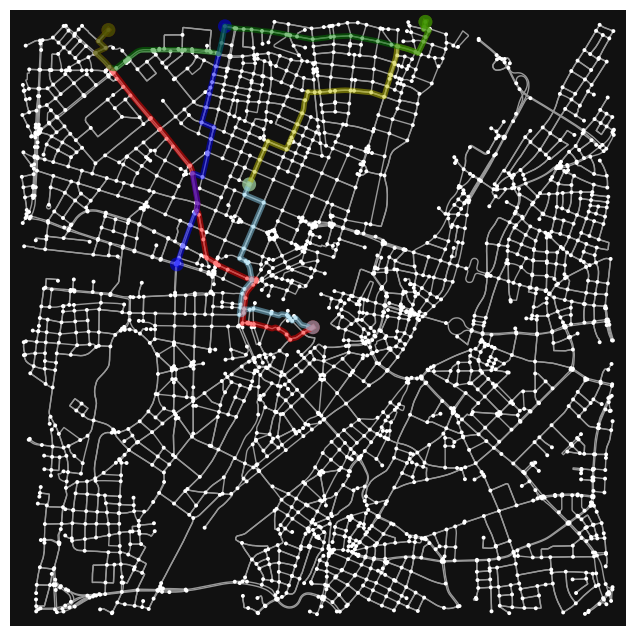

In [61]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define locations
locations = {
    "Marienplatz": "Marienplatz, Munich, Germany",
    "Olympiapark": "Olympiapark, Munich, Germany",
    "HBF": "Hauptbahnhof, Munich, Germany",
    "BMW": "BMW Welt, Munich, Germany",
    "TUM City Center": "Arcisstraße 21, 80333 Munich, Germany",
    "Münchener Freiheit": "Münchener Freiheit, Munich, Germany"
}

# Geocode locations
coords = {name: ox.geocode(loc) for name, loc in locations.items()}

# Create a network graph for Munich
G = ox.graph_from_address("Munich, Germany", network_type='drive', dist=3000)

# Find the nearest nodes to the locations
nearest_nodes = {name: ox.distance.nearest_nodes(G, point[1], point[0]) for name, point in coords.items()}

# Calculate the shortest paths
routes = [
    nx.shortest_path(G, nearest_nodes["Marienplatz"], nearest_nodes["Olympiapark"], weight='length'),
    nx.shortest_path(G, nearest_nodes["HBF"], nearest_nodes["BMW"], weight='length'),
    nx.shortest_path(G, nearest_nodes["Münchener Freiheit"], nearest_nodes["TUM City Center"], weight='length'),
    nx.shortest_path(G, nearest_nodes["Münchener Freiheit"], nearest_nodes["Olympiapark"], weight='length'),
    nx.shortest_path(G, nearest_nodes["TUM City Center"], nearest_nodes["Marienplatz"], weight='length')
]

# Initialize a list to store the coordinates of all nodes in each route
routes_coords = []

# Define a function to get the coordinates of a node
def get_coords_from_node(graph, node_id):
    node = graph.nodes[node_id]
    return node['y'], node['x']

# Iterate over each route and extract the coordinates of all nodes
for route in routes:
    route_coords = [get_coords_from_node(G, node) for node in route]
    routes_coords.append(route_coords)

# Display the routes with their node coordinates
#for i, route_coords in enumerate(routes_coords, start=1):
#    print(f"Route {i} Coordinates: {route_coords}")

# Plot the graph and routes
fig, ax = ox.plot_graph_routes(G, routes, route_colors=['r', 'b', 'y', 'green', 'skyblue'], route_linewidth=6, node_size=8)
plt.show()


# Set of Potential Facility Location K

Potential facility can have 

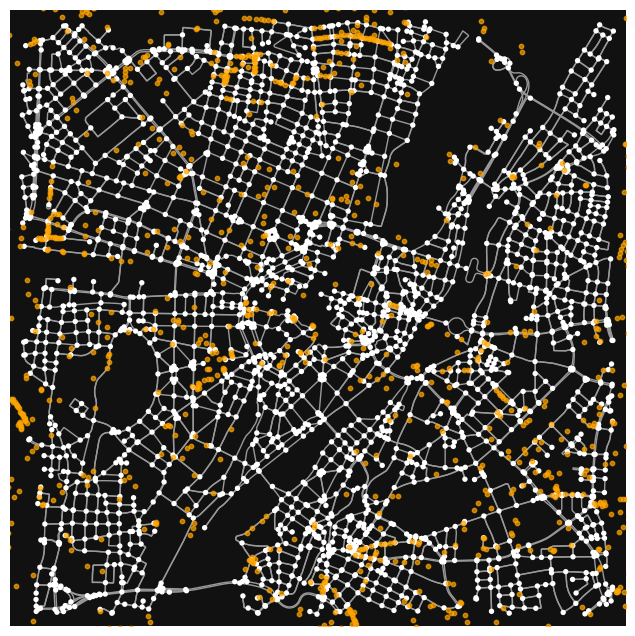

In [42]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define the city
city = "Munich, Germany"

# Create a network graph for Munich
G = ox.graph_from_address(city, network_type='drive', dist=3000)

# Fetch parking data for the entire city of Munich
parking = ox.features_from_place(city, tags={'amenity': 'parking'})

# Get the coordinates of parking
parking_coordinates = [(parking.geometry.centroid.y, parking.geometry.centroid.x) for parking in parking.itertuples()]

# Plot the graph
fig, ax = ox.plot_graph(G, show=False, close=False)

# Plot parking
for y, x in lamp_post_coords:
    ax.scatter(x, y, c='orange', s=10, alpha=0.7, zorder=5)

plt.show()
